In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)


df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

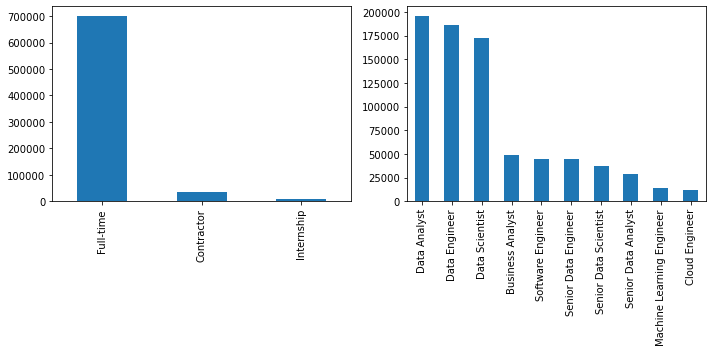

In [6]:
fig, ax = plt.subplots(1,2)

df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[0], figsize=(10,5))
df["job_title_short"].value_counts().plot(kind="bar", ax=ax[1], figsize=(10,5))

# prevent overlaps
fig.tight_layout() 

In [7]:
df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skills_count = df_skills.groupby(["job_title_short", "job_skills"]).size()
df_skills_count = skills_count.reset_index(name="skill_count")
df_skills_count.sort_values("skill_count", ascending=False, inplace=True)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


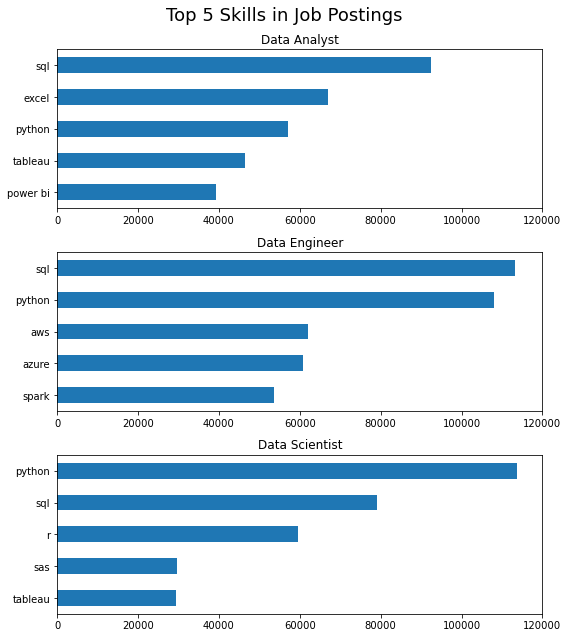

In [23]:
fig, ax = plt.subplots (3, 1, figsize=(8,9) )

job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

for i, job_title in enumerate(job_titles):
    df_plotter = df_skills_count[df_skills_count.job_title_short == job_title].head()
    df_plotter.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120_000)


fig.suptitle("Top 5 Skills in Job Postings", fontsize=18)
fig.tight_layout()